In [13]:
import json
import graphviz
import csv
import numpy as np

In [11]:
csv_file = 'allen_id_table_w_voxel_counts.csv'

test_ontology_file = 'test_ontology.json'
with open(test_ontology_file) as json_file:
    test_data = json.load(json_file)
    
ontology_file = 'allen_ontology.json'
with open(ontology_file) as json_file:
    data = json.load(json_file)

## Trying a simpler version first
Let's start with this structure but only have a single child and try to make the dot file

In [6]:
def make_graph(dic,graph):
    """ Make a edge-unweighted directed graph from a dictionary
    Representing a brain ontology
    """
    name = dic.get('name')
    children = dic.get('children')
    for child in children:
        child_name = child.get('name')
        graph.edge(name,child_name)
        make_graph(child,graph)
    return 

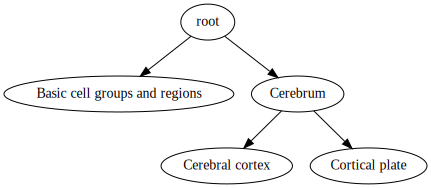

In [11]:
G = graphviz.Digraph()
make_graph(test_data,G)
G

## Real Ontology file

In [162]:
allen_graph = graphviz.Digraph()
make_graph(data,allen_graph)

In [161]:
allen_graph.save(filename='allen_graph.gv')

'allen_graph.gv'

## Playing around with attributes

In [17]:
def make_acronym_graph(dic,graph):
    """ Make a edge-unweighted directed graph from a dictionary
    Representing a brain ontology. Use acronyms instead of name
    for the node labels.
    """
    acr = dic.get('acronym')
    children = dic.get('children')
    for child in children:
        child_acr = child.get('acronym')
        graph.edge(acr,child_acr)
        make_acronym_graph(child,graph)
    return 

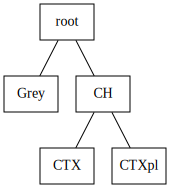

In [18]:
Gboxy = graphviz.Graph()
Gboxy.attr('node',shape='box')
make_acronym_graph(test_data,Gboxy)
Gboxy

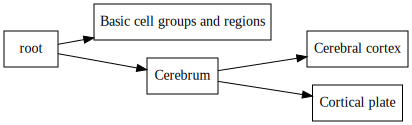

In [22]:
G_LR = graphviz.Digraph()
G_LR.attr('node',shape='box')
make_graph(test_data,G_LR)
G_LR.attr(rankdir='LR')
G_LR

## real data

In [201]:
allen_boxy_acronym_graph = graphviz.Graph()
allen_boxy_acronym_graph.attr('node',shape='box')
make_boxy_graph(data,allen_boxy_acronym_graph)

In [203]:
allen_boxy_acronym_graph.save(filename='allen_boxy_graph_acronym.gv')

'allen_boxy_graph_acronym.gv'

In [210]:
allen_boxy_graph = graphviz.Graph()
allen_boxy_graph.attr('node',shape='box')
make_graph(data,allen_boxy_graph)

In [211]:
allen_boxy_graph.save(filename='allen_boxy_graph.gv')

'allen_boxy_graph.gv'

## Try the graph left to right instead of top to bottom 

In [23]:
allen_boxy_graph_LR = graphviz.Graph()
allen_boxy_graph_LR.attr('node',shape='box')
make_graph(data,allen_boxy_graph_LR)
allen_boxy_graph_LR.attr(rankdir='LR')

In [25]:
allen_boxy_graph_LR.save('allen_boxy_graph_LR.gv')

'allen_boxy_graph_LR.gv'

## Testing coloring regions if they have voxels in the annotation file

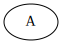

In [15]:
# First need to see how to change the color of a given node
test_graph = graphviz.Digraph()
# test_graph.node('A',color='blue')
test_graph.node('A')
test_graph

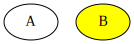

In [17]:
test_graph.node('B',style='filled',fillcolor='yellow')
test_graph

In [33]:
# Now test whether we can integrate coloring into the recursive function 
# displayed_atlas_regions = ['root','Cortical plate']
def make_colored_graph(dic,graph):
    """ Make a edge-unweighted directed graph from a dictionary
    Representing a brain ontology
    """
    name = dic.get('name')
    if name in displayed_atlas_regions:
        graph.node(name,style='filled',fillcolor='yellow')
    children = dic.get('children')
    for child in children:
        child_name = child.get('name')            
        graph.edge(name,child_name)
        make_colored_graph(child,graph)
    return

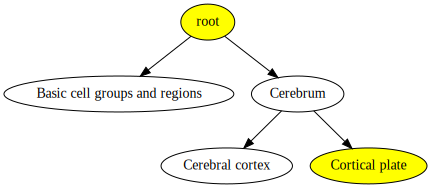

In [23]:
G = graphviz.Digraph()
make_colored_graph(test_data,G)
G

In [9]:
# OK, it is really simple. Now let's make a real list of region names from the atlas ID table

In [34]:
displayed_atlas_regions = []
with open(csv_file, mode='r') as infile:
        reader = csv.reader(infile)
        next(reader) # skips the header
        for row in reader:
            name,voxel_counts = row[1],int(row[-1])
            if voxel_counts:
                displayed_atlas_regions.append(name)
#             atlas_dict[int(id)]=name

In [35]:
len(displayed_atlas_regions)

598

In [32]:
displayed_atlas_regions

['root',
 'Frontal pole, layer 1',
 'Frontal pole, layer 2/3',
 'Primary motor area, Layer 1',
 'Primary motor area, Layer 2/3',
 'Primary motor area, Layer 5',
 'Primary motor area, Layer 6a',
 'Primary motor area, Layer 6b',
 'Secondary motor area, layer 1',
 'Secondary motor area, layer 2/3',
 'Secondary motor area, layer 5',
 'Secondary motor area, layer 6a',
 'Secondary motor area, layer 6b',
 'Primary somatosensory area, nose, layer 1',
 'Primary somatosensory area, nose, layer 2/3',
 'Primary somatosensory area, nose, layer 4',
 'Primary somatosensory area, nose, layer 5',
 'Primary somatosensory area, nose, layer 6a',
 'Primary somatosensory area, nose, layer 6b',
 'Primary somatosensory area, barrel field, layer 1',
 'Primary somatosensory area, barrel field, layer 2/3',
 'Primary somatosensory area, barrel field, layer 4',
 'Primary somatosensory area, barrel field, layer 5',
 'Primary somatosensory area, barrel field, layer 6a',
 'Primary somatosensory area, barrel field, la

In [37]:
realG = graphviz.Digraph()
realG.attr('node',shape='box')
# realG
make_colored_graph(data,realG)
realG.attr(rankdir='LR')
realG
realG.save('allen_ontology_graph_colored.gv')

'allen_ontology_graph_colored.gv'

## More recent atlas (2017)

In [14]:
atlas_segments_file = 'annotation_2017_25um_sagittal_forDVscans_segments.txt'
segments = np.loadtxt(atlas_segments_file,dtype='uint32')

In [15]:
# Now see which atlas regions (by name) are represented in this annotation volume
displayed_atlas_regions_2017 = []
with open(csv_file, mode='r') as infile:
        reader = csv.reader(infile)
        next(reader) # skips the header
        for row in reader:
            ID,name = int(row[0]),row[1]
            if ID in segments:
                displayed_atlas_regions_2017.append(name)
#             atlas_dict[int(id)]=name

In [16]:
displayed_atlas_regions_2017

['root',
 'Basic cell groups and regions',
 'Cerebrum',
 'Frontal pole, cerebral cortex',
 'Frontal pole, layer 1',
 'Frontal pole, layer 5',
 'Frontal pole, layer 6a',
 'Somatomotor areas',
 'Somatomotor areas, Layer 5',
 'Somatomotor areas, Layer 6b',
 'Primary motor area, Layer 1',
 'Primary motor area, Layer 2/3',
 'Primary motor area, Layer 6b',
 'Secondary motor area, layer 2/3',
 'Secondary motor area, layer 5',
 'Secondary motor area, layer 6a',
 'Somatosensory areas',
 'Somatosensory areas, layer 4',
 'Somatosensory areas, layer 6a',
 'Somatosensory areas, layer 6b',
 'Primary somatosensory area, layer 1',
 'Primary somatosensory area, layer 5',
 'Primary somatosensory area, layer 6a',
 'Primary somatosensory area, nose, layer 6b',
 'Primary somatosensory area, barrel field, layer 1',
 'Primary somatosensory area, barrel field, layer 4',
 'Primary somatosensory area, barrel field, layer 6a',
 'Rostrolateral lateral visual area',
 'Rostrolateral lateral visual area, layer 1',
 

In [20]:
len(displayed_atlas_regions_2017)

592

In [17]:
def make_colored_graph_2017atlas(dic,graph):
    """ Make a edge-unweighted directed graph from a dictionary
    Representing a brain ontology
    """
    name = dic.get('name')
    if name in displayed_atlas_regions_2017:
        graph.node(name,style='filled',fillcolor='yellow')
    children = dic.get('children')
    for child in children:
        child_name = child.get('name')            
        graph.edge(name,child_name)
        make_colored_graph_2017atlas(child,graph)
    return

In [28]:
realG_2017 = graphviz.Digraph()
realG_2017.attr('node',shape='box')
make_colored_graph_2017atlas(data,realG_2017)
# realG.save('allen_ontology_graph_colored.gv')

In [29]:
realG_2017.attr(rankdir='LR')

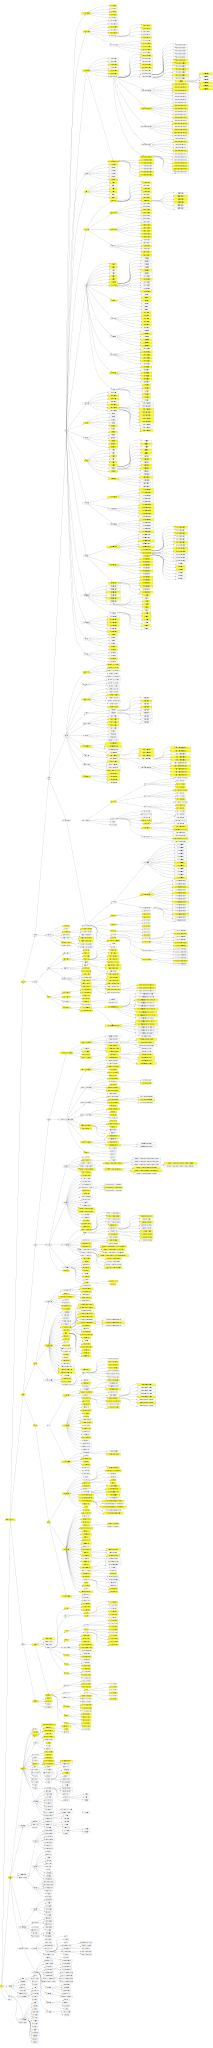

In [30]:
realG_2017

In [31]:
realG_2017.save('allen_ontology_graph_2017_colored.gv')

'allen_ontology_graph_2017_colored.gv'

## Testing out line splitting for node labels
Let's try to split node labels into two lines if they have more than 1 word in them.

In [55]:
def make_colored_graph_2017atlas_splitnames(dic,graph):
    """ Make a edge-unweighted directed graph from a dictionary
    Representing a brain ontology
    """
    name = dic.get('name')
    label = name if len(name.split())<2 else '{0}\n{1}'.format(name.split()[0],' '.join(name.split()[1:])) # ternary operator 
    if name in displayed_atlas_regions_2017:
        graph.node(name,label,style='filled',fillcolor='yellow')
    else:
        graph.node(name,label)
    children = dic.get('children')
    for child in children:
        child_name = child.get('name')            
        graph.edge(name,child_name)
        make_colored_graph_2017atlas_splitnames(child,graph)
    return

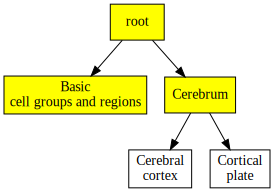

In [56]:
testG = graphviz.Digraph()
testG.attr('node',shape='box')
make_colored_graph_2017atlas_splitnames(test_data,testG)
testG

## Real data

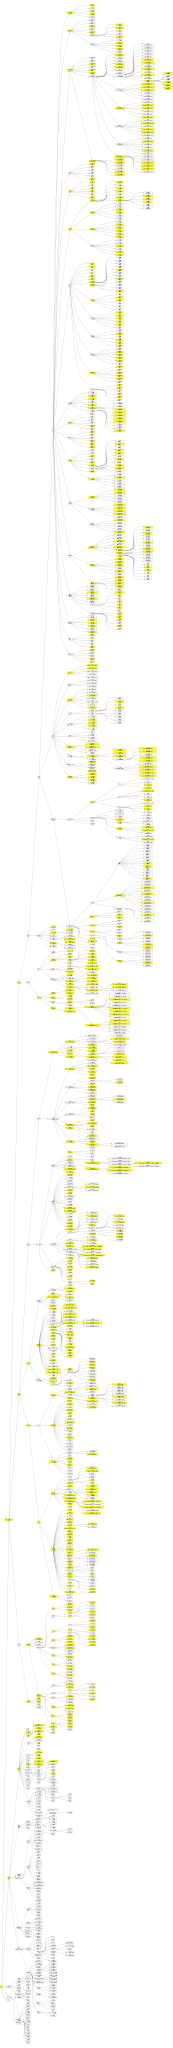

In [58]:
realG = graphviz.Digraph()
realG.attr('node',shape='box')
make_colored_graph_2017atlas_splitnames(data,realG)
realG.attr(rankdir='LR')
realG

In [59]:
realG.save('allen_ontology_graph_2017_colored_splitlines.gv')

'allen_ontology_graph_2017_colored_splitlines.gv'